In [ ]:
# PREDITOR
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from math import e,factorial,sqrt,sin
import numpy as np
from numpy import pi
import functools as ft
import random
from scipy.stats import linregress
import time
from statistics import mean




"""
    Gera vetores de pesos para diferentes tipos de médias móveis:
    SMA, WMA, EMA, PMA (Poisson), HMA (harmônica).
    
  """

def height(window,type):
  sum = 0
  sum_e = 0
  sum_h = 0
  vector = []

  for i in range(1,window+1):
    sum += i
    sum_e += e**i
    sum_h += 1/i


  if type == 'SMA':
    for i in range(1,window+1):
      vector.append(1/window)
    return vector

  if type == 'WMA':
    for i in range(1,window+1):
      vector.append((1/sum)*i)

    return vector

  if type == 'EMA':
    for i in range(1,window+1):
      vector.append((e**i)/sum_e)

    return vector

  if type == "PMA":
    for i in range(1,window+1):
      poisson = ((((window)**i)*(e**-(window)))/factorial(i))
      vector.append(poisson*2)

    return vector

  if type == 'HMA':
    for i in range(window,0,-1):
      vector.append((1/sum_h)/i)

  return vector

In [ ]:

def SMA(v,window):
  peso = height(window,'SMA')
  soma = 0
  for i in range(len(v)):
    soma += v[i]*peso[i]

  return soma

def WMA(v,window):
  peso = height(window,'WMA')
  soma = 0
  for i in range(len(v)):
    soma += v[i]*peso[i]

  return soma

def EMA(v,window):
  peso = height(window,'EMA')
  soma = 0
  for i in range(len(v)):
    soma += v[i]*peso[i]

  return soma

def PMA(v,window):
  peso = height(window,'PMA')
  soma = 0
  for i in range(len(v)):
    soma += v[i]*peso[i]

  return soma

def HMA(v,window):
  peso = height(window,'HMA')
  soma = 0
  for i in range(len(v)):
    soma += v[i]*peso[i]

  return soma



In [ ]:
def ordem_choquet(v,type):
  janela = []
  peso_1 = []

  if type == "SMA":
    peso = height(len(v),"SMA")

  if type == "WMA":
    peso = height(len(v),"WMA")

  if type == "EMA":
    peso = height(len(v),"EMA")

  if type == "PMA":
    peso = height(len(v),"PMA")

  if type == "HMA":
    peso = height(len(v),"HMA")

  for i in range(len(v)):
    janela.append(v[i])

  janela.sort()

  for i in range(len(v)):
    for j in range(len(v)):
      if v[j] == janela[i]:
        peso_1.append(peso[j])

  return janela,peso_1


"""
    Implementação das integrais de Choquet adaptativa,
    normalizando os dados e aplicando pesos com alpha.
  

    """


def choquet1(v,type,alpha):
  vetor,peso = ordem_choquet(v,type)
  soma = 0
  x_norm = []
  s_norm = sum(v)

  for i in range(len(v)):
    x_norm.append(vetor[i]/s_norm)

  for i in range(len(v)):
      if i == 0:
        soma += x_norm[i]*sum(peso)*(1 + (alpha)*(1 - x_norm[i])*(1 - sum(peso)))

      else:
        soma += abs((x_norm[i] - x_norm[i-1]))*sum(peso)*(1 + (alpha)*(1 - abs((x_norm[i] - x_norm[i-1])))*(1 - sum(peso)))

      peso.pop(0)

  return soma*s_norm






In [ ]:
def choquet2(v,type,alpha):
    vetor,peso = ordem_choquet(v,type)
    soma = 0
    x_norm = []
    s_norm = sum(v)

    for i in range(len(v)):
        x_norm.append(vetor[i]/s_norm)

    for i in range(len(v)):
        if i == 0:
            soma += max((x_norm[i]) + (sum(peso)) - 1 + alpha - alpha * abs((x_norm[i]) - (sum(peso))), 0) / (1 + alpha)

        else:
            ##falta fazer aqui
            soma += max((x_norm[i]- x_norm[i-1]) + (sum(peso)) - 1 + alpha - alpha * abs((x_norm[i] - x_norm[i-1]) - (sum(peso))), 0) / (1 + alpha)

        peso.pop(0)

    return soma*s_norm


def choquet3(v,type,alpha):
    vetor,peso = ordem_choquet(v,type)
    soma = 0
    x_norm = []
    s_norm = sum(v)

    for i in range(len(v)):
        x_norm.append(vetor[i]/s_norm)


    for i in range(len(v)):
        W = np.maximum( (x_norm[i]) + (sum(peso)) -1, 0)
        We = np.maximum( (x_norm[i] - x_norm[i-1]) + (sum(peso)) -1, 0)
        if i == 0:
            soma += (1 - alpha) * W + alpha * min(x_norm[i], (sum(peso)))

        else:
            ##falta fazer aqui
            soma += (1 - alpha) * We + alpha * min(x_norm[i] - x_norm[i-1], (sum(peso)))

        peso.pop(0)

    return soma*s_norm

def choquet4(v,type,alpha):
    vetor,peso = ordem_choquet(v,type)
    soma = 0
    x_norm = []
    s_norm = sum(v)

    for i in range(len(v)):
        x_norm.append(vetor[i]/s_norm)


    for i in range(len(v)):
        P = np.minimum( (x_norm[i]), (sum(peso)) )
        Pe = np.minimum( (x_norm[i] - x_norm[i-1]), (sum(peso)) )
        W = np.maximum( (x_norm[i]) + (sum(peso)) -1, 0)
        We = np.maximum( (x_norm[i] - x_norm[i-1]) + (sum(peso)) -1, 0)
        if i == 0:
            soma += (alpha**2 / (1 - alpha)) * W + (1 - (alpha**2)) * P + (alpha**2 * (1 + alpha) / 2) * min(x_norm[i], (sum(peso)))

        else:
            ##falta fazer aqui
            soma += (alpha**2 / (1 - alpha)) * We + (1 - (alpha**2)) * Pe + (alpha**2 * (1 + alpha) / 2) * min(x_norm[i] - x_norm[i-1], (sum(peso)))

        peso.pop(0)

    return soma*s_norm



In [ ]:
#Para habilitar a importação do Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Aqui é a abertura do arquivo e a conversão para lista dos valores reais
# Em window é o tamanho da janela que irá trabalhar para predizer


dataframe = pd.read_csv('/content/drive/MyDrive/bolsa/codigo/compilado.csv')

x = dataframe.iloc[:, 1].tolist()

x.reverse()
print(x)


window = 5

[82, 195, 50, 41, 229, 225, 220, 72, 150, 150, 323, 252, 275, 229, 135, 94, 399, 93, 162, 439, 445, 378, 1137, 1653, 1105, 301, 1176, 633, 5409, 2230, 113, 214, 284, 304, 229, 299, 167, 354, 517, 330, 192, 340, 246, 959, 3123, 5823, 449, 840, 1641, 927, 93, 756, 227, 185, 212, 215, 3313, 4619, 4754, 119, 189, 158, 101, 79, 91, 155, 135, 143, 143, 267, 172, 939, 1601, 329, 160, 141, 193, 168, 222, 338, 1041, 1000, 1528, 2644, 2782, 198, 31, 90, 279, 235, 44, 391, 3230, 300, 128, 547, 933, 1150, 135, 164, 220, 91, 250, 201, 344, 105, 168, 126, 233, 164, 230, 239, 2945, 503, 2435, 5646, 2436, 1025, 210, 515, 562, 2086, 213, 871, 2719, 275, 47, 60, 100, 47, 84, 166, 104, 132, 449, 912, 1447, 96, 123, 101, 126, 995, 912, 1905, 4552, 6758, 3373, 934, 251, 15, 66, 160, 47, 69, 78, 59, 105, 25, 1213, 38, 207, 24, 53, 241, 74, 153, 1338, 510, 111, 31, 73, 58, 91, 156, 203, 1099, 1400, 63, 91, 1380, 4394, 107, 102, 78, 342, 112, 304, 218, 145, 364, 184, 163, 148, 368, 183, 152, 278, 276, 179, 28

In [ ]:
# Função para calcular o erro com um determinado alpha

def calcular_erro(alpha,choquet):
    prediction_choquet_SMA0 = []
    prediction_choquet_WMA0 = []
    prediction_choquet_EMA0 = []
    prediction_choquet_PMA0 = []
    prediction_choquet_HMA0 = []
    alpha = round(alpha, 3)

    sliding_window = [x[i] for i in range(window)]
    prediction = [x[i] for i in range(window, len(x))]

    for j in range(len(prediction)):
        length = len(sliding_window)
        test_window = [sliding_window[i] for i in range(length - window, length)]

        prediction_choquet_SMA0.append(round(choquet(test_window, 'SMA', alpha)))
        prediction_choquet_WMA0.append(round(choquet(test_window, 'WMA', alpha)))
        prediction_choquet_EMA0.append(round(choquet(test_window, 'EMA', alpha)))
        prediction_choquet_PMA0.append(round(choquet(test_window, 'PMA', alpha)))
        prediction_choquet_HMA0.append(round(choquet(test_window, 'HMA', alpha)))

        sliding_window.append(prediction[j])

    b1 = mean_absolute_error(prediction, prediction_choquet_SMA0)
    b2 = mean_absolute_error(prediction, prediction_choquet_WMA0)
    b3 = mean_absolute_error(prediction, prediction_choquet_EMA0)
    b4 = mean_absolute_error(prediction, prediction_choquet_PMA0)
    b5 = mean_absolute_error(prediction, prediction_choquet_HMA0)
    erros = [b1, b2, b3, b4, b5]
    melhorcaso = min(erros)
    print(melhorcaso)
    btotal = (b1 + b2 + b3 + b4 + b5)
    mediaBtotal = (b1 + b2 + b3 + b4 + b5)/5
    bdf = pd.DataFrame({
        'Alpha': alpha,  # Adiciona o valor de alpha atual a todas as linhas
        'Erro': [b1, b2, b3, b4, b5, mediaBtotal],
        'Tipo': ['SMA', 'WMA', 'EMA', 'PMA', 'HMA', 'Media']})

    return btotal, bdf



974.7644817850947
974.7038334637233
974.7038334637233
974.7038334637233
974.7038334637233
974.7038334637233
974.7038334637233
total de iterações: 7
Tempo de execução: 16.71 segundos


,Alpha,Erro,Tipo
0,-0.999,1042.517807,SMA
1,-0.999,993.671690,WMA
2,-0.999,980.273377,EMA
3,-0.999,1351.514711,PMA
4,-0.999,974.703833,HMA
5,-0.999,1068.536284,Media


Melhor Alpha: -0.9989048648768389
Menor erro da média dos erros: 1068.5362835470594
numero de iteracoes: 7


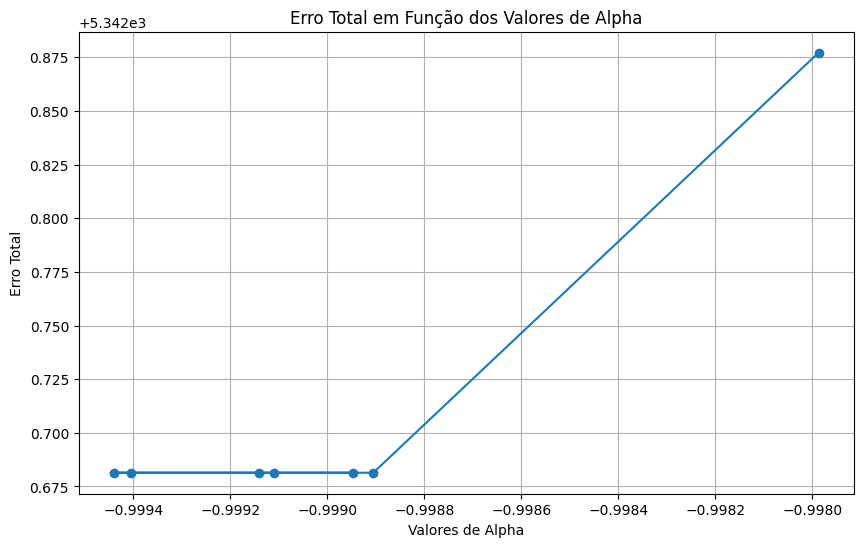

In [ ]:
dados_graficosX = []
dados_graficosY = []

inicio = time.time()

# Parâmetros iniciais
alpha_min = -1
alpha_max =  1
num_iteracoes = 0

melhor_alpha = None
melhor_erro = float('inf')
erro_anterior = float('inf')  # Inicializa a variável erro_anterior
melhorErroDisplay = None
tentativas_sem_mudanca = 0
tolerancia = 50
# Realiza a busca binária

alphasUsados = []
errosRecebidos = []

while num_iteracoes < 100:
    alpha_atual = random.uniform(alpha_min, alpha_max)
    erro_atual, erroBDF = calcular_erro(alpha_atual, choquet1)
    alphasUsados.append(alpha_atual)
    errosRecebidos.append(erro_atual)

    if erro_atual < melhor_erro:
        if abs(erro_atual - melhor_erro) < tolerancia:
            tentativas_sem_mudanca += 1
        else:
            tentativas_sem_mudanca = 0
        melhor_erro = erro_atual
        melhor_alpha = alpha_atual
        melhorErroDisplay = erroBDF
    else:
        if num_iteracoes >= 4:
            tentativas_sem_mudanca += 1
    if erro_atual < erro_anterior:
        alpha_max = alpha_atual
    else:
        alpha_min = alpha_atual

    erro_anterior = erro_atual
    num_iteracoes += 1
    if tentativas_sem_mudanca >= 4 and num_iteracoes > 4:
        break

fim = time.time()
print(f"total de iterações: {num_iteracoes}")
print(f"Tempo de execução: {round(abs(inicio - fim), 2)} segundos")

#Resultado da busca binaria

dfs = [melhorErroDisplay]
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='Tipo'), dfs)
display(df_final)
print("Melhor Alpha:", melhor_alpha)
print("Menor erro da média dos erros:", melhor_erro/5)
print(f"numero de iteracoes: {num_iteracoes}")



#Gráfico de Alpha em relação ao seu ERRO



plt.figure(figsize=(10, 6))
plt.plot(alphasUsados, errosRecebidos, marker='o')

# Adicionando títulos e rótulos
plt.title('Erro Total em Função dos Valores de Alpha')
plt.xlabel('Valores de Alpha')
plt.ylabel('Erro Total')
#plt.xlim([-1, 1])

plt.grid(True)

# Exibindo o gráfico
plt.show()


In [ ]:
dados_graficosX.append(alphasUsados)
dados_graficosY.append(errosRecebidos)


1028.4093336508045
1038.277798564577
1029.543964080411
1024.2228987380522
1024.7881220449676
1023.572978672744
1022.8638048913228
total de iterações: 7
Tempo de execução: 17.33 segundos


,Alpha,Erro,Tipo
0,0.577,1093.932753,SMA
1,0.577,1043.265417,WMA
2,0.577,1037.500935,EMA
3,0.577,1386.395796,PMA
4,0.577,1029.543964,HMA
5,0.577,1118.127773,Media


Melhor Alpha: 0.5773114792736617
Menor erro da média dos erros: 1118.1277730535053
numero de iteracoes: 7


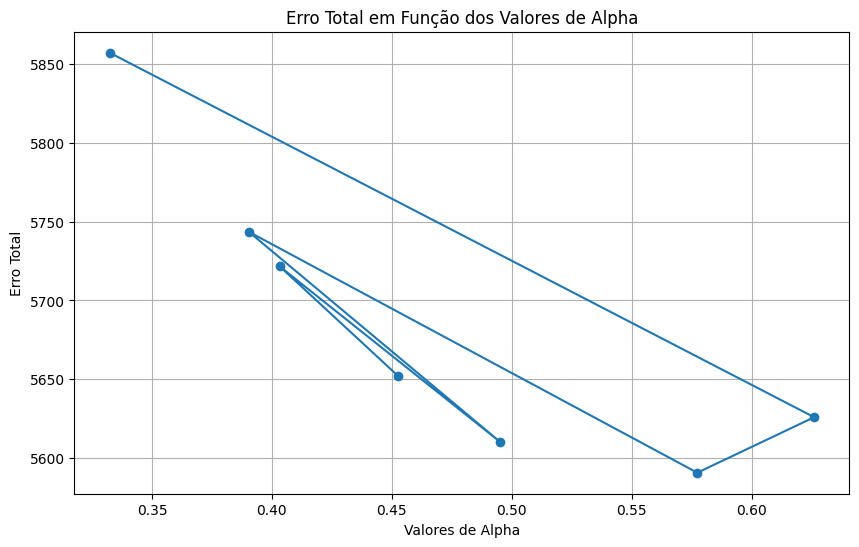

In [ ]:
inicio = time.time()

# Parâmetros iniciais
alpha_min = 0.000001
alpha_max = 0.99999
num_iteracoes = 0

melhor_alpha = None
melhor_erro = float('inf')
melhorErroDisplay = None
alphasUsados = []
errosRecebidos = []

tentativas_sem_mudanca = 0
tolerancia = 50
# Realiza a busca binária

while num_iteracoes < 100:
    alpha_atual = random.uniform(alpha_min, alpha_max)
    erro_atual, erroBDF = calcular_erro(alpha_atual, choquet2)
    alphasUsados.append(alpha_atual)
    errosRecebidos.append(erro_atual)

    if erro_atual < melhor_erro:

        if abs(erro_atual - melhor_erro) < tolerancia:
            tentativas_sem_mudanca += 1
        else:
            tentativas_sem_mudanca = 0
        melhor_erro = erro_atual
        melhor_alpha = alpha_atual
        melhorErroDisplay = erroBDF
    else:
        if num_iteracoes >= 4:
            tentativas_sem_mudanca += 1
    if erro_atual < erro_anterior:
        alpha_max = alpha_atual
    else:
        alpha_min = alpha_atual

    erro_anterior = erro_atual
    num_iteracoes += 1
    if tentativas_sem_mudanca >= 4 and num_iteracoes > 4:
        break

print(f"total de iterações: {num_iteracoes}")
fim = time.time()
print(f"Tempo de execução: {round(abs(inicio - fim), 2)} segundos")

dfs = [melhorErroDisplay]
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='Tipo'), dfs)
display(df_final)
print("Melhor Alpha:", melhor_alpha)
print("Menor erro da média dos erros:", melhor_erro/5)
print(f"numero de iteracoes: {num_iteracoes}")

plt.figure(figsize=(10, 6))
plt.plot(alphasUsados, errosRecebidos, marker='o')

# Adicionando títulos e rótulos
plt.title('Erro Total em Função dos Valores de Alpha')
plt.xlabel('Valores de Alpha')
plt.ylabel('Erro Total')
plt.grid(True)

# Exibindo o gráfico
plt.show()
dados_graficosX.append(alphasUsados)
dados_graficosY.append(errosRecebidos)


7014.7368277832575
0
6853.414776012789
0
6754.67029490799
0
7047.821354467839
0
6912.410013946053
1
6983.225994081431
2
6922.070580631994
3
6953.075308683969
4
8
Tempo de execução: 51.32 segundos


,Alpha,Erro,Tipo
0,0.107,1053.247049,SMA
1,0.107,1052.305725,WMA
2,0.107,1047.532161,EMA
3,0.107,2547.000442,PMA
4,0.107,1054.584918,HMA
5,0.107,1350.934059,Media


Melhor Alpha: 0.10670822708588501
Menor erro da média dos erros: 1350.934058981598
numero de iteracoes: 8


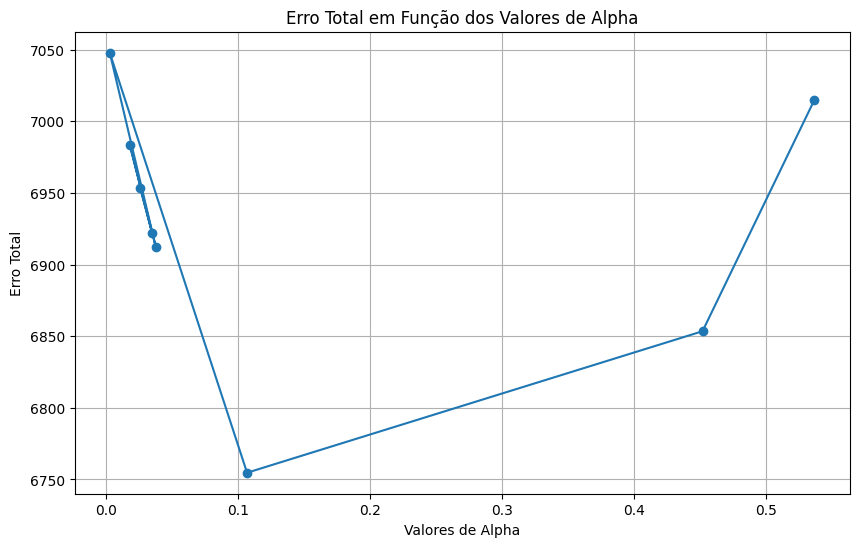

In [ ]:
inicio = time.time()

# Parâmetros iniciais
alpha_min = 0.000001
alpha_max = 0.99999
num_iteracoes = 0

melhor_alpha = None
melhor_erro = float('inf')
erro_anterior = float('inf')  # Inicializa a variável erro_anterior
melhorErroDisplay = None
alphasUsados = []
errosRecebidos = []
tentativas_sem_mudanca = 0
tolerancia = 50

# Realiza a busca binária

while num_iteracoes < 100:
    alpha_atual = random.uniform(alpha_min, alpha_max)
    erro_atual, erroBDF = calcular_erro(alpha_atual, choquet3)
    alphasUsados.append(alpha_atual)
    errosRecebidos.append(erro_atual)
    print(erro_atual)
    if erro_atual < melhor_erro:

        if abs(erro_atual - melhor_erro) < tolerancia:
            tentativas_sem_mudanca += 1
        else:
            tentativas_sem_mudanca = 0
        melhor_erro = erro_atual
        melhor_alpha = alpha_atual
        melhorErroDisplay = erroBDF
    else:
        if num_iteracoes >= 4:
            tentativas_sem_mudanca += 1
    print(tentativas_sem_mudanca)
    if erro_atual < erro_anterior:
        alpha_max = alpha_atual
    else:
        alpha_min = alpha_atual

    erro_anterior = erro_atual
    num_iteracoes += 1
    if tentativas_sem_mudanca >= 4 and num_iteracoes > 4:
        break
print(num_iteracoes)
fim = time.time()
print(f"Tempo de execução: {round(abs(inicio - fim), 2)} segundos")

dfs = [melhorErroDisplay]
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='Tipo'), dfs)
display(df_final)
print("Melhor Alpha:", melhor_alpha)
print("Menor erro da média dos erros:", melhor_erro/5)
print(f"numero de iteracoes: {num_iteracoes}")


plt.figure(figsize=(10, 6))
plt.plot(alphasUsados, errosRecebidos, marker='o')

# Adicionando títulos e rótulos
plt.title('Erro Total em Função dos Valores de Alpha')
plt.xlabel('Valores de Alpha')
plt.ylabel('Erro Total')
plt.grid(True)

# Exibindo o gráfico
#plt.show()


dados_graficosX.append(alphasUsados)
dados_graficosY.append(errosRecebidos)


8
Tempo de execução: 77.55 segundos


,Alpha,Erro,Tipo
0,-0.525,1513.619681,SMA
1,-0.525,1455.235586,WMA
2,-0.525,1317.926596,EMA
3,-0.525,1845.983537,PMA
4,-0.525,1439.590326,HMA
5,-0.525,1514.471145,Media


Melhor Alpha: -0.5247590563302882
Menor erro da média dos erros: 1514.4711452770503
numero de iteracoes: 8


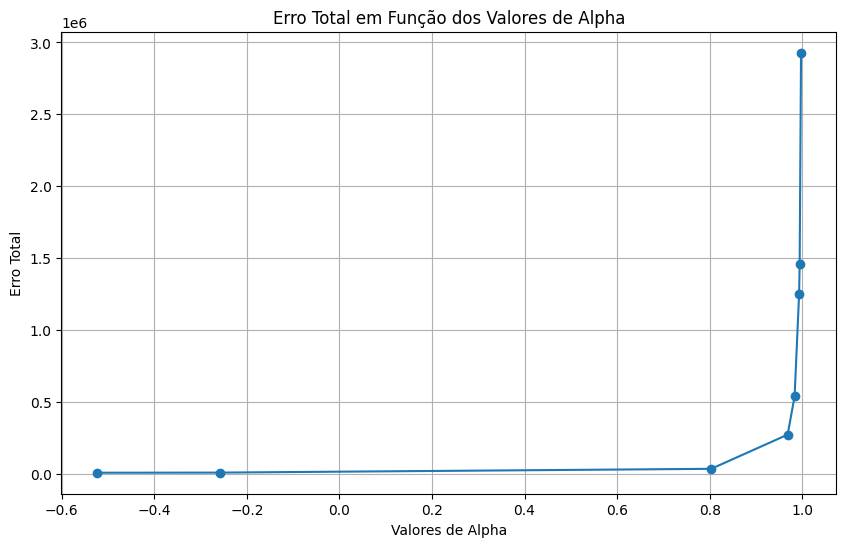

In [ ]:
inicio = time.time()

# Parâmetros iniciais
alpha_min = -0.999999999
alpha_max = 0.9999999999
num_iteracoes = 0

melhor_alpha = None
melhor_erro = float('inf')
melhorErroDisplay = None
alphasUsados = []
errosRecebidos = []
tentativas_sem_mudanca = 0
tolerancia = 50
# Realiza a busca binária

while num_iteracoes < 100:
    alpha_atual = random.uniform(alpha_min, alpha_max)
    erro_atual, erroBDF = calcular_erro(alpha_atual, choquet4)
    alphasUsados.append(alpha_atual)
    errosRecebidos.append(erro_atual)

    if erro_atual < melhor_erro:
        if abs(erro_atual - melhor_erro) < tolerancia:
            tentativas_sem_mudanca += 1
        else:
            tentativas_sem_mudanca = 0
        melhor_erro = erro_atual
        melhor_alpha = alpha_atual
        melhorErroDisplay = erroBDF
    else:
        if num_iteracoes >= 4:
            tentativas_sem_mudanca += 1
    if erro_atual < erro_anterior:
        alpha_max = alpha_atual
    else:
        alpha_min = alpha_atual

    erro_anterior = erro_atual
    num_iteracoes += 1
    if tentativas_sem_mudanca >= 4 and num_iteracoes > 4:
        break
print(num_iteracoes)

fim = time.time()
print(f"Tempo de execução: {round(abs(inicio - fim), 2)} segundos")

dfs = [melhorErroDisplay]
df_final = ft.reduce(lambda left, right: pd.merge(left, right, on='Tipo'), dfs)
display(df_final)
print("Melhor Alpha:", melhor_alpha)
print("Menor erro da média dos erros:", melhor_erro/5)
print(f"numero de iteracoes: {num_iteracoes}")


plt.figure(figsize=(10, 6))
plt.plot(alphasUsados, errosRecebidos, marker='o')

# Adicionando títulos e rótulos
plt.title('Erro Total em Função dos Valores de Alpha')
plt.xlabel('Valores de Alpha')
plt.ylabel('Erro Total')
plt.grid(True)

# Exibindo o gráfico
#plt.show()

dados_graficosX.append(alphasUsados)
dados_graficosY.append(errosRecebidos)

In [ ]:
#for i in range(len(dados_graficosX)):
    plt.figure(figsize=(10, 6))
    plt.plot(dados_graficosX[i], dados_graficosY[i], marker='o')

    # Adicionando títulos e rótulos
    plt.title(f'Erro Total em Função dos Valores de Alpha - Choquet {i+1}')
    plt.xlabel('Valores de Alpha')
    plt.ylabel('Erro Total')
    plt.grid(True)

    # Exibindo o gráfico
    plt.show()
    print("\n")

IndentationError: unexpected indent (<ipython-input-13-2945ef72f598>, line 2)